<a href="https://colab.research.google.com/github/mohamedtamer82/Extrovert-or-Introvert-prediction/blob/main/Introverts_and_Extroverts_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
train_data=pd.read_csv('/content/train.csv')


# data preprocessing for training data



In [51]:
train_data.columns = train_data.columns.str.lower().str.replace(' ', '_')
string_columns = list(train_data.columns[train_data.dtypes == 'object'])
print(string_columns)
for col in string_columns:
    train_data[col] = train_data[col].str.lower().str.replace(' ', '_')

['stage_fear', 'drained_after_socializing', 'personality']


In [52]:
train_data.head()

,id,time_spent_alone,stage_fear,social_event_attendance,going_outside,drained_after_socializing,friends_circle_size,post_frequency,personality
0,0,0.0,no,6.0,4.0,no,15.0,5.0,extrovert
1,1,1.0,no,7.0,3.0,no,10.0,8.0,extrovert
2,2,6.0,yes,1.0,0.0,NaN,3.0,0.0,introvert
3,3,3.0,no,7.0,3.0,no,11.0,5.0,extrovert
4,4,1.0,no,4.0,4.0,no,13.0,NaN,extrovert


In [53]:
train_data=train_data.drop(['id'],axis=1)

In [54]:
print(train_data.shape)

(18524, 8)


In [55]:
train_data.head()

,time_spent_alone,stage_fear,social_event_attendance,going_outside,drained_after_socializing,friends_circle_size,post_frequency,personality
0,0.0,no,6.0,4.0,no,15.0,5.0,extrovert
1,1.0,no,7.0,3.0,no,10.0,8.0,extrovert
2,6.0,yes,1.0,0.0,NaN,3.0,0.0,introvert
3,3.0,no,7.0,3.0,no,11.0,5.0,extrovert
4,1.0,no,4.0,4.0,no,13.0,NaN,extrovert


In [56]:
train_data.isnull().sum()

,0
time_spent_alone,1190
stage_fear,1893
social_event_attendance,1180
going_outside,1466
drained_after_socializing,1149
friends_circle_size,1054
post_frequency,1264
personality,0


# taking care of missing values in training data

In [57]:
pd.crosstab(train_data['personality'], train_data['drained_after_socializing'], normalize='index')


drained_after_socializing,no,yes
personality,,
extrovert,0.982171,0.017829
introvert,0.075399,0.924601


In [58]:
np.random.seed(42)

def fill_drained(row):
    if pd.isnull(row['drained_after_socializing']):
        if row['personality'] == 'extrovert':
            return np.random.choice(['No', 'Yes'], p=[0.98, 0.02])
        elif row['personality'] == 'introvert':
            return np.random.choice(['No', 'Yes'], p=[0.08, 0.92])
    else:
        return row['drained_after_socializing']

train_data['drained_after_socializing'] = train_data.apply(fill_drained, axis=1)


In [59]:
pd.crosstab(train_data['personality'], train_data['stage_fear'], normalize='index')

stage_fear,no,yes
personality,,
extrovert,0.981195,0.018805
introvert,0.072286,0.927714


In [60]:
np.random.seed(42)

def fill_drained(row):
    if pd.isnull(row['stage_fear']):
        if row['personality'] == 'extrovert':
            return np.random.choice(['No', 'Yes'], p=[0.98, 0.02])
        elif row['personality'] == 'introvert':
            return np.random.choice(['No', 'Yes'], p=[0.08, 0.92])
    else:
        return row['stage_fear']

train_data['stage_fear'] = train_data.apply(fill_drained, axis=1)


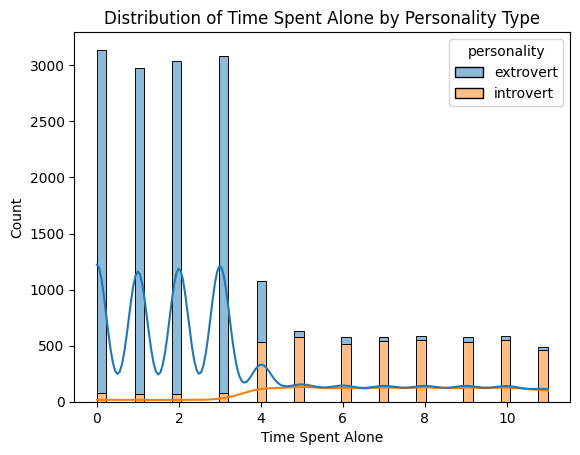

In [61]:
sns.histplot(data=train_data, x='time_spent_alone', hue='personality', kde=True, multiple='stack')
plt.title("Distribution of Time Spent Alone by Personality Type")
plt.xlabel("Time Spent Alone")
plt.ylabel("Count")
plt.show()



In [62]:
np.random.seed(42)

train_data.loc[(train_data['personality'] == 'extrovert') & (train_data['time_spent_alone'].isnull()), 'time_spent_alone'] = \
    np.random.uniform(0, 4, size=train_data[(train_data['personality'] == 'extrovert') & (train_data['time_spent_alone'].isnull())].shape[0])

train_data.loc[(train_data['personality'] == 'introvert') & (train_data['time_spent_alone'].isnull()), 'time_spent_alone'] = \
    np.random.uniform(5, 10, size=train_data[(train_data['personality'] == 'introvert') & (train_data['time_spent_alone'].isnull())].shape[0])


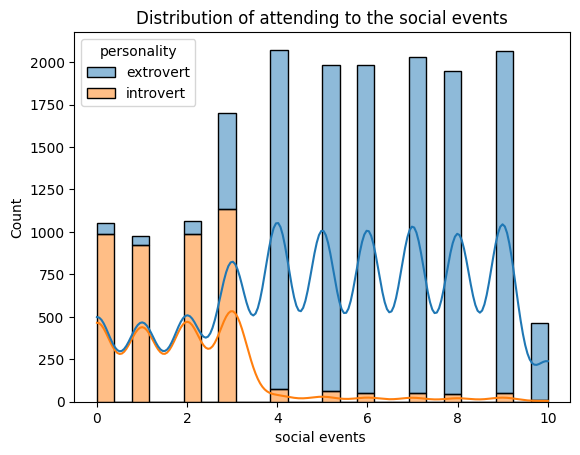

In [63]:
sns.histplot(data=train_data, x='social_event_attendance', hue='personality', kde=True, multiple='stack')
plt.title("Distribution of attending to the social events")
plt.xlabel("social events ")
plt.ylabel("Count")
plt.show()

In [64]:
np.random.seed(42)

train_data.loc[(train_data['personality'] == 'extrovert') & (train_data['social_event_attendance'].isnull()), 'social_event_attendance'] = \
    np.random.uniform(0, 5, size=train_data[(train_data['personality'] == 'extrovert') & (train_data['social_event_attendance'].isnull())].shape[0])

train_data.loc[(train_data['personality'] == 'introvert') & (train_data['social_event_attendance'].isnull()), 'social_event_attendance'] = \
    np.random.uniform(5, 12, size=train_data[(train_data['personality'] == 'introvert') & (train_data['social_event_attendance'].isnull())].shape[0])


In [65]:
train_data.isnull().sum()

,0
time_spent_alone,0
stage_fear,0
social_event_attendance,0
going_outside,1466
drained_after_socializing,0
friends_circle_size,1054
post_frequency,1264
personality,0


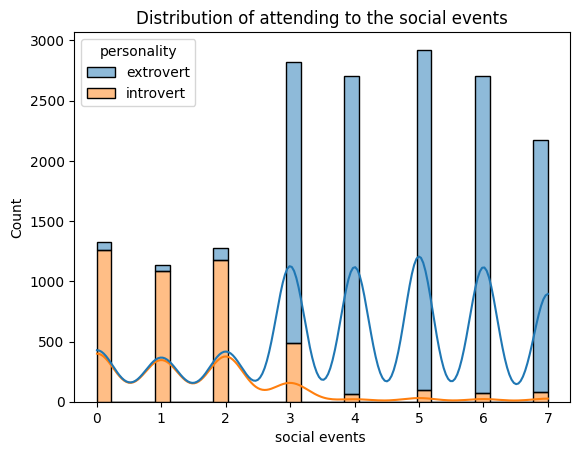

In [66]:
sns.histplot(data=train_data, x='going_outside', hue='personality', kde=True, multiple='stack')
plt.title("Distribution of attending to the social events")
plt.xlabel("social events ")
plt.ylabel("Count")
plt.show()

In [67]:
np.random.seed(42)

train_data.loc[(train_data['personality'] == 'extrovert') & (train_data['going_outside'].isnull()), 'going_outside'] = \
    np.random.uniform(0, 3, size=train_data[(train_data['personality'] == 'extrovert') & (train_data['going_outside'].isnull())].shape[0])

train_data.loc[(train_data['personality'] == 'introvert') & (train_data['going_outside'].isnull()), 'going_outside'] = \
    np.random.uniform(3, 7, size=train_data[(train_data['personality'] == 'introvert') & (train_data['going_outside'].isnull())].shape[0])


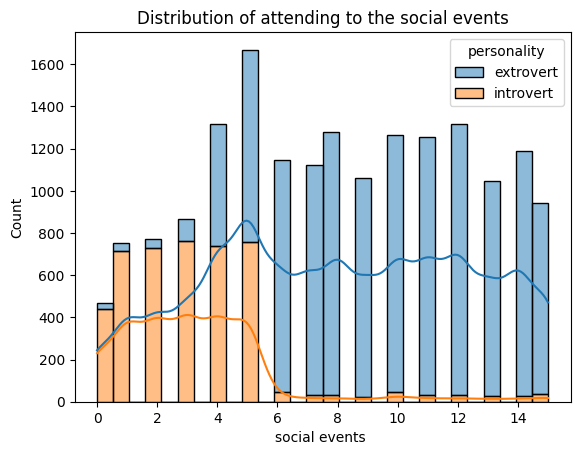

In [68]:
sns.histplot(data=train_data, x='friends_circle_size', hue='personality', kde=True, multiple='stack')
plt.title("Distribution of attending to the social events")
plt.xlabel("social events ")
plt.ylabel("Count")
plt.show()

In [69]:
np.random.seed(42)

train_data.loc[(train_data['personality'] == 'extrovert') & (train_data['friends_circle_size'].isnull()), 'friends_circle_size'] = \
    np.random.uniform(0, 5, size=train_data[(train_data['personality'] == 'extrovert') & (train_data['friends_circle_size'].isnull())].shape[0])

train_data.loc[(train_data['personality'] == 'introvert') & (train_data['friends_circle_size'].isnull()), 'friends_circle_size'] = \
    np.random.uniform(5, 15, size=train_data[(train_data['personality'] == 'introvert') & (train_data['friends_circle_size'].isnull())].shape[0])


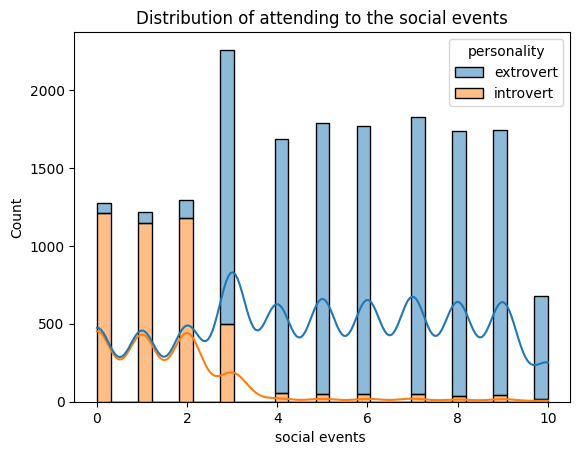

In [70]:
sns.histplot(data=train_data, x='post_frequency', hue='personality', kde=True, multiple='stack')
plt.title("Distribution of attending to the social events")
plt.xlabel("social events ")
plt.ylabel("Count")
plt.show()

In [71]:
np.random.seed(42)

train_data.loc[(train_data['personality'] == 'extrovert') & (train_data['post_frequency'].isnull()), 'post_frequency'] = \
    np.random.uniform(0, 5, size=train_data[(train_data['personality'] == 'extrovert') & (train_data['post_frequency'].isnull())].shape[0])

train_data.loc[(train_data['personality'] == 'introvert') & (train_data['post_frequency'].isnull()), 'post_frequency'] = \
    np.random.uniform(5, 15, size=train_data[(train_data['personality'] == 'introvert') & (train_data['post_frequency'].isnull())].shape[0])


In [72]:
train_data.isnull().sum()

,0
time_spent_alone,0
stage_fear,0
social_event_attendance,0
going_outside,0
drained_after_socializing,0
friends_circle_size,0
post_frequency,0
personality,0


# taking care of missing values in test data set

In [73]:
test_data=pd.read_csv('/content/test.csv')

In [74]:
test_data.columns = test_data.columns.str.lower().str.replace(' ', '_')


In [75]:
test_data.head()

,id,time_spent_alone,stage_fear,social_event_attendance,going_outside,drained_after_socializing,friends_circle_size,post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [76]:
test_data=test_data.drop(['id'],axis=1)

In [77]:
test_data.head()

,time_spent_alone,stage_fear,social_event_attendance,going_outside,drained_after_socializing,friends_circle_size,post_frequency
0,3.0,No,7.0,4.0,No,6.0,NaN
1,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,3.0,No,5.0,6.0,No,15.0,9.0
3,3.0,No,4.0,4.0,No,5.0,6.0
4,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [78]:
test_data.isnull().sum()

,0
time_spent_alone,425
stage_fear,598
social_event_attendance,397
going_outside,466
drained_after_socializing,432
friends_circle_size,350
post_frequency,408


In [79]:
for cat_col in ['drained_after_socializing', 'stage_fear']:
    mode_val = train_data[cat_col].mode()[0]
    test_data[cat_col].fillna(mode_val, inplace=True)


/tmp/ipython-input-2127117535.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data[cat_col].fillna(mode_val, inplace=True)


In [80]:
for num_col in ['time_spent_alone', 'social_event_attendance', 'going_outside', 'friends_circle_size', 'post_frequency']:
    median_val = train_data[num_col].median()
    test_data[num_col].fillna(median_val, inplace=True)


/tmp/ipython-input-4024032483.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data[num_col].fillna(median_val, inplace=True)


In [81]:
print("Missing values after test imputation:\n", test_data.isnull().sum())


Missing values after test imputation:
 time_spent_alone             0
stage_fear                   0
social_event_attendance      0
going_outside                0
drained_after_socializing    0
friends_circle_size          0
post_frequency               0
dtype: int64


In [82]:
Y = test_data.values
print(type(Y))


<class 'numpy.ndarray'>


In [83]:
# Make sure test_data has the exact same column names as training
test_data.columns = [col.lower() for col in test_data.columns]

# Encoding

In [84]:
submission=pd.read_csv('/content/sample_submission.csv')

In [85]:
submission.columns = submission.columns.str.strip()
print(submission.columns)
submission['Personality']


Index(['id', 'Personality'], dtype='object')


,Personality
0,Extrovert
1,Extrovert
2,Extrovert
3,Extrovert
4,Extrovert
...,...
6170,Extrovert
6171,Extrovert
6172,Extrovert
6173,Extrovert


In [86]:
x=train_data.values

In [87]:
print(x[0:5])

[[0.0 'no' 6.0 4.0 'no' 15.0 5.0 'extrovert']
 [1.0 'no' 7.0 3.0 'no' 10.0 8.0 'extrovert']
 [6.0 'yes' 1.0 0.0 np.str_('Yes') 3.0 0.0 'introvert']
 [3.0 'no' 7.0 3.0 'no' 11.0 5.0 'extrovert']
 [1.0 'no' 4.0 4.0 'no' 13.0 1.8727005942368125 'extrovert']]


In [88]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cols_to_encode = [1, 4, 7]
for col in cols_to_encode:
    x[:, col] = le.fit_transform(x[:, col])


In [89]:
print(x[0:4])

[[0.0 2 6.0 4.0 2 15.0 5.0 0]
 [1.0 2 7.0 3.0 2 10.0 8.0 0]
 [6.0 3 1.0 0.0 1 3.0 0.0 1]
 [3.0 2 7.0 3.0 2 11.0 5.0 0]]


In [90]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cols_to_encode = [1, 4]
for col in cols_to_encode:
    Y[:, col] = le.fit_transform(Y[:, col])


In [91]:
print(Y[0:3])

[[3.0 0 7.0 4.0 0 6.0 5.0]
 [2.0 1 0.0 0.0 1 5.0 1.0]
 [3.0 0 5.0 6.0 0 15.0 9.0]]


In [92]:
le_df = LabelEncoder()
train_data['stage_fear'] = le_df.fit_transform(train_data['stage_fear'])
train_data['drained_after_socializing'] = le_df.fit_transform(train_data['drained_after_socializing'])
test_data['stage_fear'] = le_df.transform(test_data['stage_fear'])
test_data['drained_after_socializing'] = le_df.transform(test_data['drained_after_socializing'])



# Training the model

In [93]:
from sklearn.model_selection import train_test_split
x= train_data.drop('personality', axis=1)
y = train_data['personality']
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [94]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

In [95]:
print(train_data.dtypes)
print(test_data.dtypes)

time_spent_alone             float64
stage_fear                     int64
social_event_attendance      float64
going_outside                float64
drained_after_socializing      int64
friends_circle_size          float64
post_frequency               float64
personality                   object
dtype: object
time_spent_alone             float64
stage_fear                     int64
social_event_attendance      float64
going_outside                float64
drained_after_socializing      int64
friends_circle_size          float64
post_frequency               float64
dtype: object


In [96]:
y_all_encoded = label_encoder.fit_transform(y)

from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(x, y_all_encoded)

test_data_labeled = test_data.copy()
test_data_labeled['Personality'] = submission['Personality'].astype(str)


In [97]:
y_train_series = pd.Series(y_train).astype(str)


In [98]:
all_labels = pd.concat([y_train_series, test_data_labeled["Personality"]], axis=0).reset_index(drop=True)
label_encoder = LabelEncoder()
label_encoder.fit(all_labels)


LabelEncoder()

In [99]:
y_train_encoded = label_encoder.transform(y_train_series)
y_test_encoded = label_encoder.transform(test_data_labeled["Personality"])

In [100]:
X_full = pd.concat([x_train, test_data_labeled.drop(columns=["Personality"])], axis=0).reset_index(drop=True)
y_full = pd.Series(list(y_train_encoded) + list(y_test_encoded)).reset_index(drop=True)

In [101]:
X_train_new, X_val_new, y_train_new, y_val_new = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42, stratify=y_full
)
model = XGBClassifier(eval_metric='logloss', random_state=1)
model.fit(X_train_new, y_train_new)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [103]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_val_new)
print("✅ Accuracy on validation set:", accuracy_score(y_val_new, y_pred))
print("\n✅ Classification Report:\n", classification_report(
    y_val_new, y_pred, target_names=label_encoder.classes_
))


✅ Accuracy on validation set: 0.957370802572041

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      2187
           1       0.96      0.93      0.94       777
   Extrovert       0.97      0.95      0.96      1235

    accuracy                           0.96      4199
   macro avg       0.96      0.95      0.95      4199
weighted avg       0.96      0.96      0.96      4199



In [104]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_full, y_full, cv=5)
print("Cross-validated accuracy: ", scores.mean())


Cross-validated accuracy:  0.9523673312720728


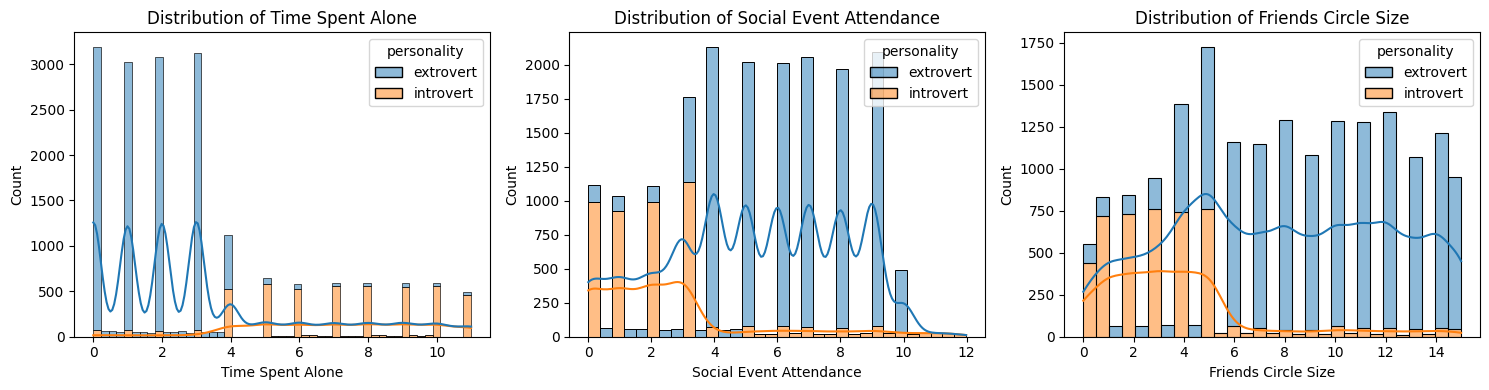

In [105]:
features = ['time_spent_alone', 'social_event_attendance', 'friends_circle_size']

plt.figure(figsize=(15, 4))
for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=train_data, x=feature, hue='personality', kde=True, multiple='stack', palette=['#1f77b4', '#ff7f0e'])
    plt.title(f'Distribution of {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


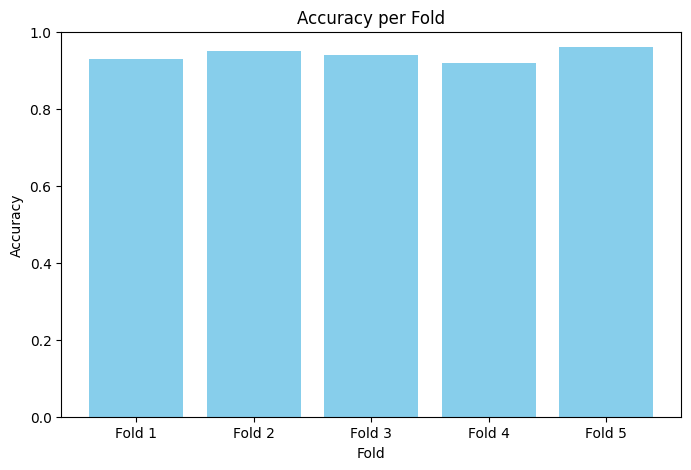

In [108]:
# Example accuracy scores from different folds or models
accuracies = [0.93, 0.95, 0.94, 0.92, 0.96]
folds = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

plt.figure(figsize=(8,5))
plt.bar(folds, accuracies, color='skyblue')
plt.ylim(0,1)
plt.title('Accuracy per Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()


/tmp/ipython-input-2916598403.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='personality', y='time_spent_alone', data=train_data, errorbar=None, palette='pastel')


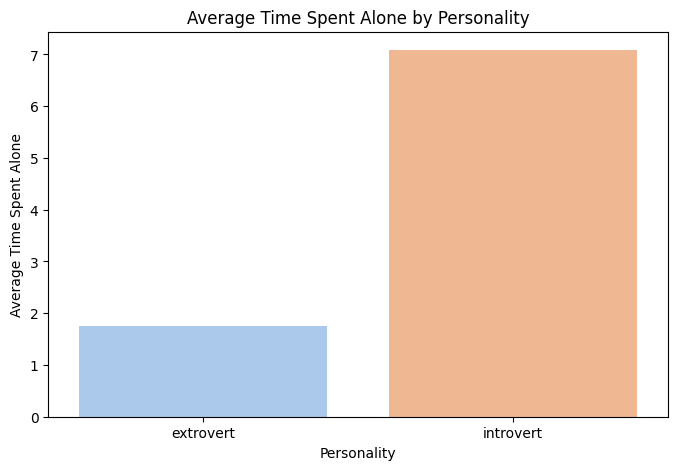

In [114]:
# Assuming train_data is your DataFrame

plt.figure(figsize=(8,5))
sns.barplot(x='personality', y='time_spent_alone', data=train_data, errorbar=None, palette='pastel')
plt.title('Average Time Spent Alone by Personality')
plt.xlabel('Personality')
plt.ylabel('Average Time Spent Alone')
plt.show()
